VISI KOMPUTER DAN PENGOLAHAN CITRA

UTS NO.2
HISTOGRAM EQUALIZATION

In [68]:
import numpy as np

h = np.array([2, 4, 3, 1, 3, 6, 4, 3, 1, 0, 3, 2])

cw = np.arange(float(12)) * 0
wb = np.arange(float(12)) * 0
cc = 0
print("w\t|\tcw\t|\tw-baru \t\t|\tw-baru(pembulatan)")
for i in range(0, 12):
    cc += h[i]
    cw[i] = cc
    wb = (cw[i] * 12) / np.sum(h)
    print((i+1),"\t|\t", (cw[i]), "\t|\t", (wb), "  \t|\t", (round(wb)))

w	|	cw	|	w-baru 		|	w-baru(pembulatan)
1 	|	 2.0 	|	 0.75   	|	 1
2 	|	 6.0 	|	 2.25   	|	 2
3 	|	 9.0 	|	 3.375   	|	 3
4 	|	 10.0 	|	 3.75   	|	 4
5 	|	 13.0 	|	 4.875   	|	 5
6 	|	 19.0 	|	 7.125   	|	 7
7 	|	 23.0 	|	 8.625   	|	 9
8 	|	 26.0 	|	 9.75   	|	 10
9 	|	 27.0 	|	 10.125   	|	 10
10 	|	 27.0 	|	 10.125   	|	 10
11 	|	 30.0 	|	 11.25   	|	 11
12 	|	 32.0 	|	 12.0   	|	 12


HISTOGRAM EQUALIZATION DENGAN INPUT GAMBAR

width :  589
height :  441
channel :  3
Data type :  uint8


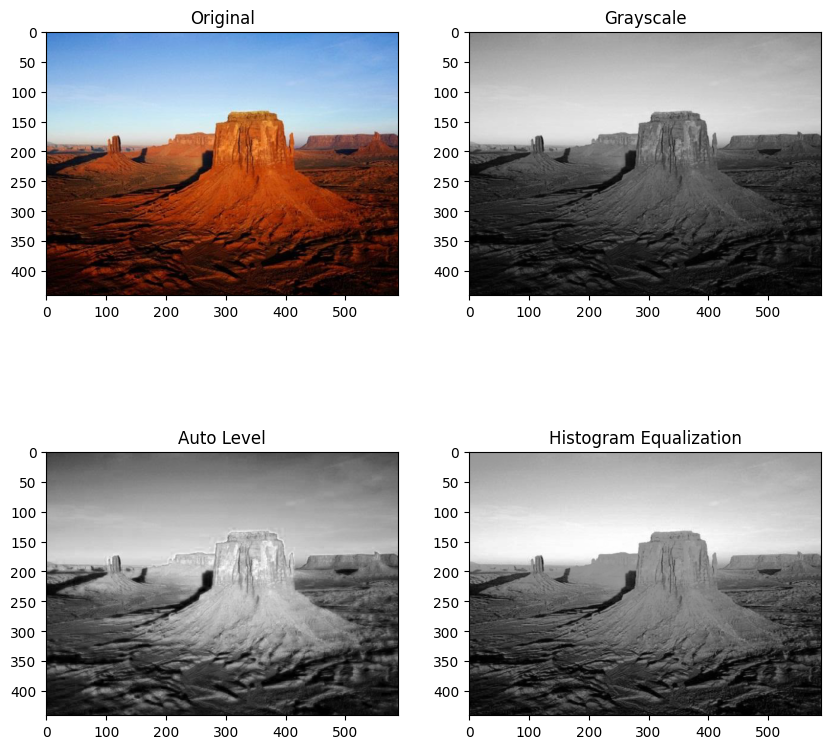

Waktu Proses Grayscale   :  1801.8772602081299 mili detik
Waktu Proses Auto-Level  :  1881.8295001983643 mili detik
Waktu Proses Equalization:  2203.6283016204834 mili detik
 
Hasil Original
0 29366 29366
1 7275 36641
2 7791 44432
3 8219 52651
4 8269 60920
5 8089 69009
6 8368 77377
7 8147 85524
8 8300 93824
9 7733 101557
 
Hasil Greysacle
0 735 735
1 2415 3150
2 4008 7158
3 4818 11976
4 5316 17292
5 5229 22521
6 5514 28035
7 5706 33741
8 5466 39207
9 6060 45267
 
Hasil Auto Level
0 2121 2121
1 1224 3345
2 1194 4539
3 1713 6252
4 1467 7719
5 1497 9216
6 1644 10860
7 1752 12612
8 1839 14451
9 1812 16263
 
Hasil H. Equalization
0 735 735
1 2415 3150
2 4008 7158
3 4818 11976
4 0 11976
5 5316 17292
6 0 17292
7 5229 22521
8 0 22521
9 5514 28035


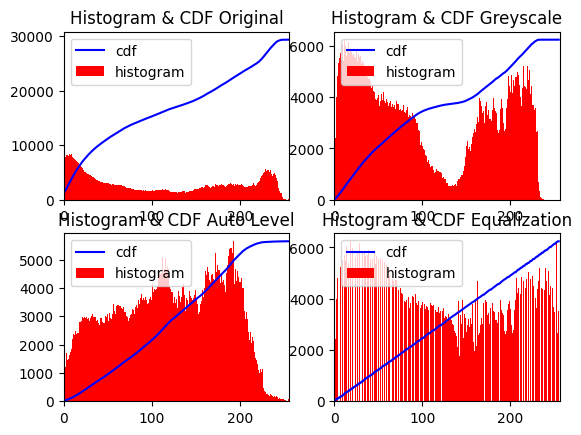

In [1]:
# Histogram For Pixel Intensity
import matplotlib.pyplot as plt
import time
import numpy as np
from PIL import Image   

# Direktori
Gambar = Image.open('Gambar1.png')

# Original
img = np.array(Gambar)
h, w, c = img.shape
print('width : ', w)  # kolom
print('height : ', h)  # baris
print('channel : ', c)  # channel
print('Data type : ', img.dtype)

# Grayscale
start_time1 = time.time()
imgGray = np.array(Gambar)
imgGrayE = np.array(Gambar)
h, w, c = imgGray.shape
for x in range(0, w):
    for y in range(0, h):
        (R, G, B) = imgGray[y, x]
        r = int(R)
        g = int(G)
        b = int(B)
        xg = int((r + g + b)/3)
        imgGray[y, x] = (xg, xg, xg)
        imgGrayE[y, x] = (xg, xg, xg)
stop_time1 = time.time()
exec_time1 = (stop_time1 - start_time1)*1000

# Auto Level
start_time2 = time.time()
imgAuto = np.array(Gambar)
xgmax = np.amin(imgAuto)
xgmin = np.amax(imgAuto)
h, w, c = imgAuto.shape
for x in range(0, w):
    for y in range(0, h):
        (R, G, B) = imgAuto[y, x]
        r = int(R)
        if r < xgmin:
            xgmin = r
        if r > xgmax:
            xgmax = r
for x in range(0, w):
    for y in range(0, h):
        (R, G, B) = imgAuto[y, x]
        r = int(R)
        xb = int(255*(r-xgmin)/(xgmax-xgmin))
        imgAuto[y, x] = (xb, xb, xb)
stop_time2 = time.time()
exec_time2 = (stop_time2 - start_time2)*1000

# CDF dan Histogram Equalization
start_time3 = time.time()
imgHe = imgGrayE
k = np.arange(float(256))  # Menyiapkan ruang array untuk nilai Histogram
l = np.arange(float(256))  # Menyiapkan ruang array untuk nilai CDF
h, w, c = imgHe.shape
for i in range(0, 256):  # Menyiapkan ruang untuk histogram sebanyak 256
    k[i] = 0
for x in range(0, w):  # plot jumlah nilai Histogram H[nilai pixel R]
    for y in range(0, h):
        (R, G, B) = imgHe[y, x]
        r = int(R)
        k[r] = k[r] + 1

l[0] = k[0]
for i in range(1, 256):  # plot Kurva CDF nilai RGB 0 sd 255
    l[i] = l[i-1] + k[i]

nx = int(w)
ny = int(h)
for x in range(0, w):
    for y in range(0, h):
        (R, G, B) = imgHe[y, x]
        r = int(R)
        xe = int(255*l[r]/nx/ny)
        imgHe[y, x] = (xe, xe, xe)
stop_time3 = time.time()
exec_time3 = (stop_time3 - start_time3)*1000

# Tampilkan Gambar
fig0 = plt.figure(figsize=(10, 10))
fig0.add_subplot(2, 2, 1)
plt.imshow(img)
plt.title("Original")
fig0.add_subplot(2, 2, 2)
plt.imshow(imgGray)
plt.title("Grayscale")
fig0.add_subplot(2, 2, 3)
plt.imshow(imgAuto)
plt.title("Auto Level")
fig0.add_subplot(2, 2, 4)
plt.imshow(imgHe)
plt.title("Histogram Equalization")
plt.show()

# Hasil waktu pemrosesan
print('Waktu Proses Grayscale   : ', exec_time1, 'mili detik')
print('Waktu Proses Auto-Level  : ', exec_time2, 'mili detik')
print('Waktu Proses Equalization: ', exec_time3, 'mili detik')

# Tampilkan Histogram & CDF
hist0, bins0 = np.histogram(img.flatten(), 256, [0, 256])
cdf0 = hist0.cumsum()
cdf_normalized0 = cdf0 * hist0.max() / cdf0.max()
plt.subplot(2, 2, 1)
plt.plot(cdf_normalized0, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.title("Histogram & CDF Original")
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
print(' ')
print('Hasil Original')
for x in range(10):
    print(x, hist0[x], cdf0[x])

hist1, bins1 = np.histogram(imgGray.flatten(), 256, [0, 256])
cdf1 = hist1.cumsum()
cdf_normalized1 = cdf1 * hist1.max() / cdf1.max()
plt.subplot(2, 2, 2)
plt.plot(cdf_normalized1, color='b')
plt.hist(imgGray.flatten(), 256, [0, 256], color='r')
plt.title("Histogram & CDF Greyscale")
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
print(' ')
print('Hasil Greysacle')
for x in range(10):
    print(x, hist1[x], cdf1[x])

hist2, bins2 = np.histogram(imgAuto.flatten(), 256, [0, 256])
cdf2 = hist2.cumsum()
cdf_normalized2 = cdf2 * hist2.max() / cdf2.max()
plt.subplot(2, 2, 3)
plt.plot(cdf_normalized2, color='b')
plt.hist(imgAuto.flatten(), 256, [0, 256], color='r')
plt.title("Histogram & CDF Auto Level")
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
print(' ')
print('Hasil Auto Level')
for x in range(10):
    print(x, hist2[x], cdf2[x])

hist3, bins3 = np.histogram(imgHe.flatten(), 256, [0, 256])
cdf3 = hist3.cumsum()
cdf_normalized3 = cdf3 * hist3.max() / cdf3.max()
plt.subplot(2, 2, 4)
plt.plot(cdf_normalized3, color='b')
plt.hist(imgHe.flatten(), 256, [0, 256], color='r')
plt.title("Histogram & CDF Equalization")
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
print(' ')
print('Hasil H. Equalization')
for x in range(10):
    print(x, hist3[x], cdf3[x])

plt.show()